# Plotting results of validation using article database

#### Sagar Setru, September 21th, 2020

## Brief description using CoNVO framework

### Context

Some people are eager to get news from outside of their echo chamber. However, they do not know where to go outside of their echo chambers, and may also have some activation energy when it comes to seeking information from other sources. In the meantime, most newsfeeds only push you content that you agree with. You end up in an echo chamber, but may not have ever wanted to be in one in the first place.

### Need

A way to find news articles from different yet reliable media sources.

### Vision

Debiaser, a data product (maybe Chrome plug-in?) that will recommend news articles similar in topic to the one currently being read, but from several pre-curated and reliable news media organizations across the political spectrum, for example, following the "media bias chart" here https://www.adfontesmedia.com/ or the "media bias ratings" here: https://www.allsides.com/media-bias/media-bias-ratings. The app will determine the main topics of the text of a news article, and then show links to similar articles from other news organizations.

The product will generate topics for a given document via latent Dirichlet allocation (LDA) and then search news websites for the topic words generated.

Caveats: Many of these articles may be behind paywalls. News aggregators already basically do this. How different is this than just searching Google using the title of an article?

### Outcome

People who are motivated to engage in content outside of their echo chambers have a tool that enables them to quickly find news similar to what they are currently reading, but from a variety of news organizations.

### Plotting results of validation

In [1]:
# make sure I'm in the right environment (should be 'debiaser')
import os
print('Conda environment:')
print(os.environ['CONDA_DEFAULT_ENV'])

Conda environment:
debiaser


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load all the validation data

In [41]:
# load pickle files

coherence_scores = pickle.load( open( './validation_data/coherence_scores_ec2_umass_1.pkl', 'rb'))
topic_word_probs = pickle.load( open( './validation_data/topic_word_probs.pkl', 'rb'))
jaccard_sim_all = pickle.load( open( './validation_data/jaccard_sim_all.pkl', 'rb'))
cosine_sim_all = pickle.load( open( './validation_data/cosine_sim_all.pkl', 'rb'))
number_most_common_words = pickle.load( open( './validation_data/number_most_common_words.pkl', 'rb'))
n_sentences = pickle.load( open( './validation_data/n_sentences.pkl', 'rb'))
num_lda_topics = pickle.load( open( './validation_data/num_lda_topics_ec2_1.pkl', 'rb'))

Plot coherence vs. n topics

(1000, 5)
(5,)


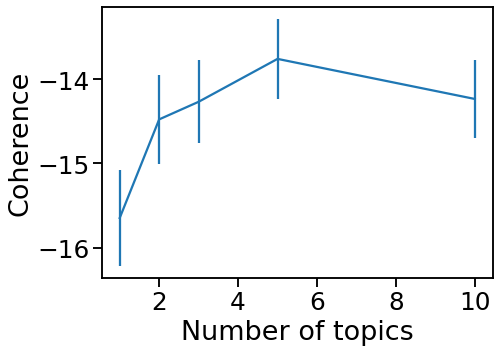

<Figure size 432x288 with 0 Axes>

In [18]:
num_lda_topics = [1,2,3,5,10]

coherence_scores_mean_per_sampling = np.mean(coherence_scores,axis=1)

coherence_scores_mean_per_sampling_per_num_topics = np.mean(coherence_scores_mean_per_sampling,axis=0)
coherence_scores_std_dev_per_sampling_per_num_topics = np.std(coherence_scores_mean_per_sampling,axis=0)

print(coherence_scores_mean_per_sampling.shape)
print(coherence_scores_mean_per_sampling_per_num_topics.shape)

plt.figure(figsize=(7,5));
plt.errorbar(num_lda_topics,coherence_scores_mean_per_sampling_per_num_topics,yerr=coherence_scores_std_dev_per_sampling_per_num_topics);
plt.ylabel('Coherence');
plt.xlabel('Number of topics')
sns.set_context('talk', font_scale=1.5);
# plt.xticks(rotation=90);
plt.show();
plt.clf();

We see that 5 topics provides the highest coherence among words in topics, for the numbers of topics tested.

What does the probability of a word given the topic look like when just 1 topic is used, which reduces LDA to a dirichlet-multinomial clustering model? (See Blei, Ng, Jordan, 2003)

(1000, 50, 10)
(50, 10)
(10,)
[0.03540826 0.02502673 0.02031532 0.01767512 0.0159043  0.01464067
 0.01370872        nan        nan        nan]


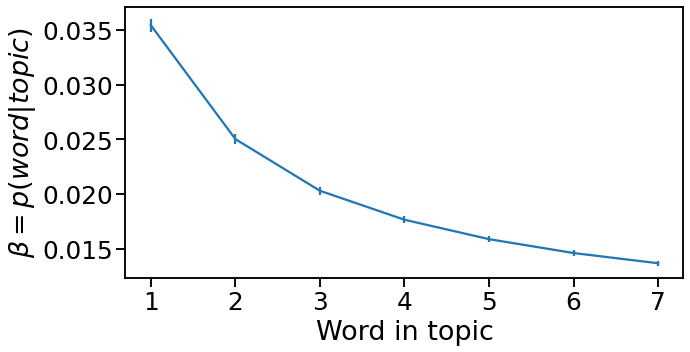

<Figure size 432x288 with 0 Axes>

In [128]:
# plotting for probability vs words, when single topics used
print(topic_word_probs.shape)

topic_word_probs_mean_samples = np.mean(topic_word_probs,axis=0)
print(topic_word_probs_mean_samples.shape)

topic_word_probs_mean_samples_articles = np.mean(topic_word_probs_mean_samples,axis=0)
topic_word_probs_std_samples_articles = np.std(topic_word_probs_mean_samples,axis=0)
print(topic_word_probs_mean_samples_articles.shape)
print(topic_word_probs_mean_samples_articles)

plt.figure(figsize=(10,5));
# plt.plot(num_lda_topics,perplexity_scores_mean_per_sampling_per_num_topics);
plt.errorbar(np.arange(1,topic_word_probs_mean_samples_articles.shape[0]+1),topic_word_probs_mean_samples_articles,yerr=topic_word_probs_std_samples_articles);
plt.ylabel(r'$\beta = p(word | topic)$');
plt.xlabel('Word in topic')
sns.set_context('talk', font_scale=1.5);
# plt.xticks(rotation=90);
plt.show();
plt.clf();

For just 1 topic, we see that there are words with a high probability

(1000, 50, 5)
(1000, 5)
(1000,)


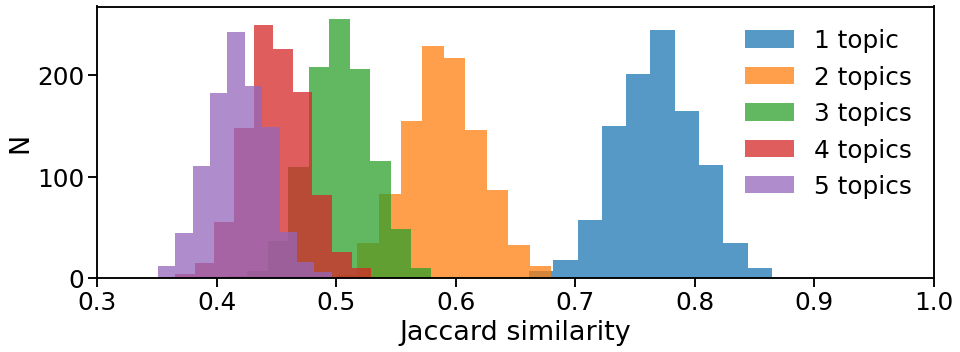

<Figure size 432x288 with 0 Axes>

In [160]:
# jaccard sim analysis

print(jaccard_sim_all.shape)

jaccard_sim_mean_per_sampling = np.mean(jaccard_sim_all,axis=1)
print(jaccard_sim_mean_per_sampling.shape)

jaccard_sim_mean_1_topic = jaccard_sim_mean_per_sampling[:,0]
jaccard_sim_mean_2_topic = jaccard_sim_mean_per_sampling[:,1]
jaccard_sim_mean_3_topic = jaccard_sim_mean_per_sampling[:,2]
jaccard_sim_mean_4_topic = jaccard_sim_mean_per_sampling[:,3]
jaccard_sim_mean_5_topic = jaccard_sim_mean_per_sampling[:,4]

print(jaccard_sim_mean_1_topic.shape)

plt.figure(figsize=(15,5));
plt.hist(jaccard_sim_mean_1_topic,alpha=0.75);
plt.hist(jaccard_sim_mean_2_topic,alpha=0.75);
plt.hist(jaccard_sim_mean_3_topic,alpha=0.75);
plt.hist(jaccard_sim_mean_4_topic,alpha=0.75);
plt.hist(jaccard_sim_mean_5_topic,alpha=0.75);
plt.ylabel('N');
plt.xlabel('Jaccard similarity')
plt.legend(('1 topic','2 topics','3 topics','4 topics','5 topics'),framealpha=0)
sns.set_context('talk', font_scale=1.5);
plt.xlim([0.3,1])
# plt.xticks(rotation=90);
plt.show();
plt.clf();

(1000, 50, 5)
(1000, 5)
(1000,)


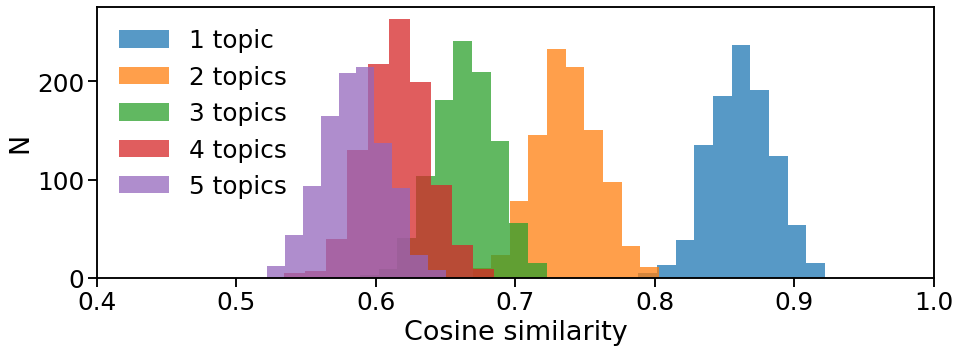

<Figure size 432x288 with 0 Axes>

In [163]:
# cosine sim analysis

print(cosine_sim_all.shape)

cosine_sim_mean_per_sampling = np.mean(cosine_sim_all,axis=1)
print(cosine_sim_mean_per_sampling.shape)

cosine_sim_mean_1_topic = cosine_sim_mean_per_sampling[:,0]
cosine_sim_mean_2_topic = cosine_sim_mean_per_sampling[:,1]
cosine_sim_mean_3_topic = cosine_sim_mean_per_sampling[:,2]
cosine_sim_mean_4_topic = cosine_sim_mean_per_sampling[:,3]
cosine_sim_mean_5_topic = cosine_sim_mean_per_sampling[:,4]

print(cosine_sim_mean_1_topic.shape)

plt.figure(figsize=(15,5));
plt.hist(cosine_sim_mean_1_topic,alpha=0.75);
plt.hist(cosine_sim_mean_2_topic,alpha=0.75);
plt.hist(cosine_sim_mean_3_topic,alpha=0.75);
plt.hist(cosine_sim_mean_4_topic,alpha=0.75);
plt.hist(cosine_sim_mean_5_topic,alpha=0.75);
plt.ylabel('N');
plt.xlabel('Cosine similarity')
plt.legend(('1 topic','2 topics','3 topics','4 topics','5 topics'),framealpha=0)
sns.set_context('talk', font_scale=1.5);
plt.xlim([0.4,1])
# plt.xticks(rotation=90);
plt.show();
plt.clf();

In [140]:
nwords_shape = number_most_common_words.shape
print(nwords_shape)
number_most_common_words_lin = number_most_common_words.reshape((nwords_shape[0]*nwords_shape[1],1))
print(number_most_common_words_lin.shape)

(1000, 50)
[[12.]
 [ 5.]
 [ 6.]
 ...
 [10.]
 [12.]
 [ 6.]]
(50000, 1)


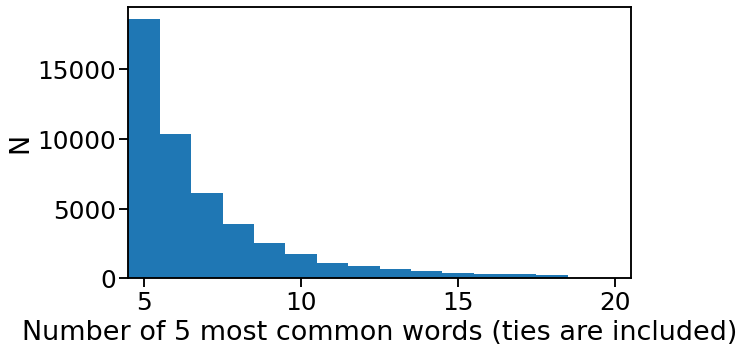

<Figure size 432x288 with 0 Axes>

In [156]:
plt.figure(figsize=(9,5));
plt.hist(number_most_common_words_lin,bins=np.arange(5,20)-.5);
plt.ylabel('N');
plt.xlabel('Number of 5 most common words (ties are included)')
sns.set_context('talk', font_scale=1.5);
# plt.xticks(rotation=90);
plt.xlim([4.5,20.5])
plt.show();
plt.clf();

In [23]:
nsentences_shape = n_sentences.shape
print(nsentences_shape)
n_sentences_lin = n_sentences.reshape((nsentences_shape[0]*nsentences_shape[1],1))
print(n_sentences_lin.shape)

(1000, 50)
(50000, 1)


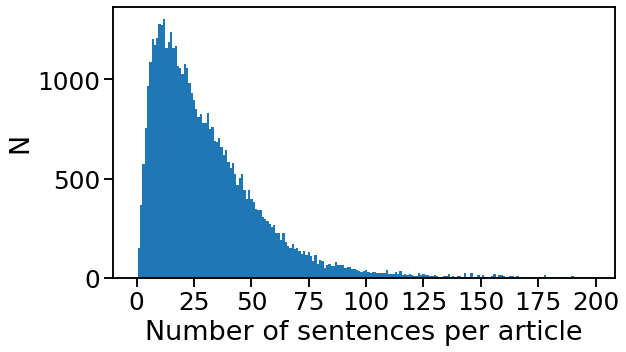

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(9,5));
plt.hist(n_sentences_lin,bins=np.arange(0,200,1)-.5);
plt.ylabel('N');
plt.xlabel('Number of sentences per article')
sns.set_context('talk', font_scale=1.5);
# plt.xticks(rotation=90);
# plt.xlim([4.5,20.5])
plt.xticks(ticks=np.arange(0,225,25))
plt.show();
plt.clf();